In [24]:
import numpy as np
import pandas as pd
import copy #Use for Deep copy

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:

with open('/home/jyoti/Downloads/MTech_Dissertation-main/dataset for binary opinion/WVSCM/new code/response_matrix.npy', 'rb') as f:
    response_matrix = np.load(f)
print(response_matrix)

[[ 1  0  0 ... -1 -1 -1]
 [ 0  0  0 ...  1  1 -1]
 [ 0  0  1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [32]:
response_matrix.shape

(64, 2135)

In [26]:
train = pd.read_csv('/home/jyoti/Downloads/MTech_Dissertation-main/dataset for binary opinion/WVSCM/new code/new_gold.csv')
print(train.head())

   Unnamed: 0  Question_id  Question_Reduced_Id  Gold_level
0           0         2001                 1973           1
1           1         2002                 1974           0
2           2         2003                 1975           0
3           3         2004                 1976           1
4           4         2005                 1977           0


#Majority voting

In [27]:
def majority(J, block, a):
    for j in range(block.shape[1]):
        for k in range(block.shape[0]):
            if response_matrix[a + k][j] != -1:
                J[j][response_matrix[a + k][j]] += 1

    return J

In [33]:
c,r=len(np.unique(response_matrix))-1,response_matrix.shape[1]
p=r*c

In [36]:
gold_total=len(train)

In [37]:
a, b = 0, 16

M = np.array([-1]*p).reshape(r, c)
Majority_Result = np.array([-1]*r)

while b <= response_matrix.shape[0]:
    A = response_matrix[a : b]
    M = majority(M, A, a)

    for j in range(M.shape[0]):
        Majority_Result[j] = np.argmax(M[j])

    right = 0
    for j in range(len(train)):
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            right += 1

    print(f'Accuracy after {b} annotators\' response is {right / gold_total * 100 :.4f} %')

    a = b
    b += 16

Accuracy after 16 annotators' response is 68.7500 %
Accuracy after 32 annotators' response is 74.3750 %
Accuracy after 48 annotators' response is 71.2500 %
Accuracy after 64 annotators' response is 75.0000 %


In [38]:
Confusion_matrix = np.zeros((2, 2), dtype = 'int64')
for j in range(len(train)):
    if train[train.columns[3]][j] == 1:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[0][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[0][1] += 1

    elif train[train.columns[3]][j] == 0:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[1][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[1][0] += 1
print(Confusion_matrix)

[[42 16]
 [24 78]]


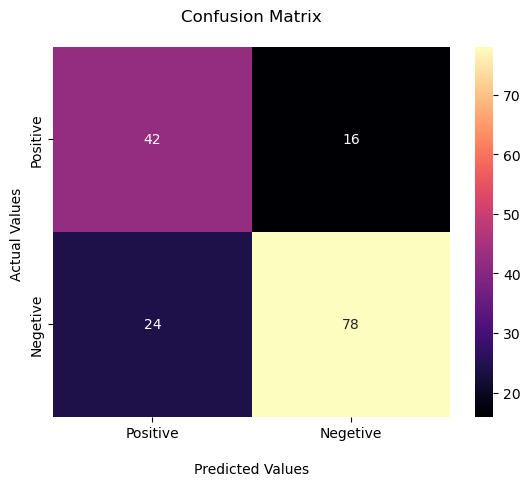

In [39]:
ax = sns.heatmap(Confusion_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(i for i in ('Positive', 'Negetive'))
ax.yaxis.set_ticklabels(i for i in ('Positive', 'Negetive'))
plt.show()

#Weighted Majority Voting

In [40]:
def weighted_majority(J, block, a):
    for j in range(block.shape[1]):
        for k in range(block.shape[0]):
            if response_matrix[a + k][j] != -1:
                J[j][response_matrix[a + k][j]] += accuracy[a + k]

    return J

In [43]:
s1 = int(len(train)* 0.3)
train2 = train[:s1]

In [44]:
accuracy = [1 / len(train2)]*response_matrix.shape[0]
for i in range (response_matrix.shape[0]):
    tot, corr = 0.0, 0.0
    for j in range(len(train2)):
        if -1 != response_matrix[i][train2[train2.columns[2]][j]]:
            tot += 1
            if train2[train.columns[3]][j] == response_matrix[i][train2[train2.columns[2]][j]]:
                corr += 1
    if tot != 0:
        accuracy[i] += corr / tot
        
accuracy = ((accuracy - np.min(accuracy))/ (np.max(accuracy)-(np.min(accuracy)))) * 0.5

In [45]:
accuracy[:5]

array([0.        , 0.33333333, 0.        , 0.        , 0.28571429])

In [46]:
a, b = 0, 16

M = np.array([-1.]*p).reshape(r, c)
Weighted_Majority_Result = np.array([-1]*r)

while b <= response_matrix.shape[0]:
    A = response_matrix[a : b]
    M = weighted_majority(M, A, a)

    for j in range(M.shape[0]):
        Weighted_Majority_Result[j] = np.argmax(M[j])

    right = 0
    for j in range(len(train)):
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            right += 1

    print(f'Accuracy after {b} annotators\' response is {right / len(train) * 100 :.4f} %')

    a = b
    b += 16

Accuracy after 16 annotators' response is 70.0000 %
Accuracy after 32 annotators' response is 75.6250 %
Accuracy after 48 annotators' response is 74.3750 %
Accuracy after 64 annotators' response is 73.1250 %


In [47]:
Confusion_matrix = np.zeros((2, 2), dtype = 'int64')
for j in range(len(train)):
    if train[train.columns[3]][j] == 1:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[0][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[0][1] += 1
    elif train[train.columns[3]][j] == 0:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[1][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[1][0] += 1
print(Confusion_matrix)

[[39 19]
 [24 78]]


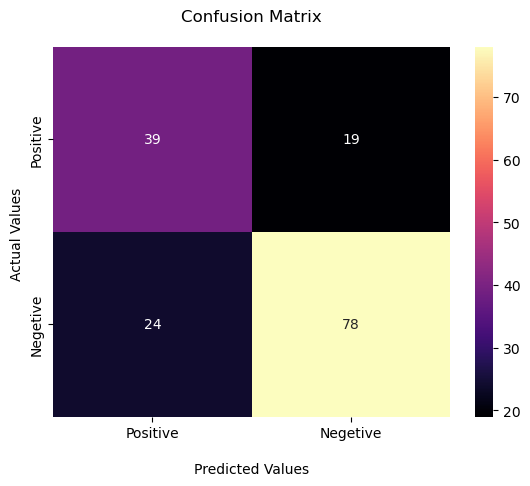

In [48]:
ax = sns.heatmap(Confusion_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(i for i in ('Positive', 'Negetive'))
ax.yaxis.set_ticklabels(i for i in ('Positive', 'Negetive'))
plt.show()